# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
display(study_data_complete.head())


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),:]

print("\nDuplicate mice:")
print(duplicates)                                                                    


Duplicate mice:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
clean_study_data = study_data_complete[~study_data_complete['Mouse ID'].isin(duplicate_mice)]

In [6]:
# Checking the number of mice in the clean DataFrame.
print("\nNumber of unique mice in cleaned data:", len(clean_study_data['Mouse ID'].unique()))


Number of unique mice in cleaned data: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stat = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_stat = summary_stat[["mean","std"]]
summary_stat ["var"] = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stat ["median"]=clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stat["sem"]=clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stat=summary_stat[["mean", "median", "var", "std", "sem"]]
summary_stat

print("\nsummary_stat:")
print(summary_stat)

display(summary_stat.head())


summary_stat:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_study_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

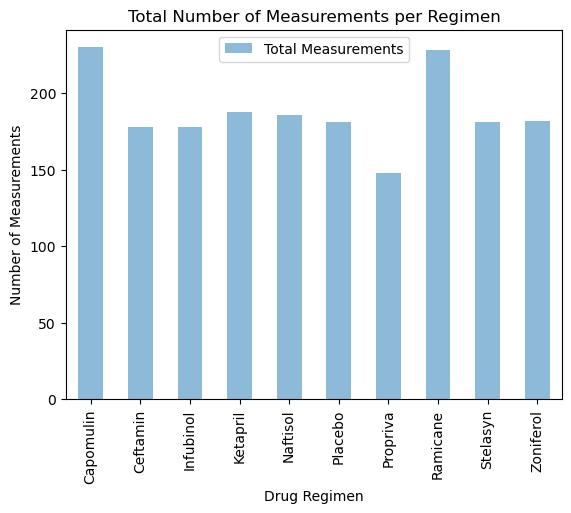

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_group = clean_study_data.groupby("Drug Regimen").count()
pandas_bar = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})
pandas_bar.plot(kind = "bar", alpha = .50)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")
plt.show()

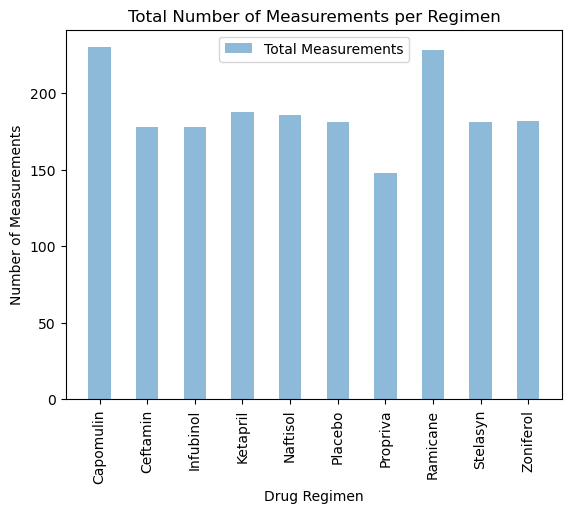

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group))
tick_locations = [x *1.7 for x in x_axis]
plt.bar(tick_locations, pandas_bar["Total Measurements"], alpha = .5, align = "center", label ="Total Measurements")
plt.xticks(tick_locations, regimen_group.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.legend(loc = "best")
plt.show()


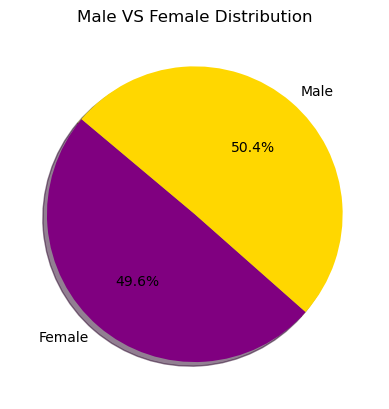

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

sex_df = clean_study_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()
sex_df = sex_df["Mouse ID"].to_frame().rename(columns ={"Mouse ID" : "Total"})

colors = ["purple", "gold"]
sex_df.plot(kind = "pie", y = "Total", title = "Male VS Female Distribution", autopct="%1.1f%%", shadow=True, startangle=140, colors = colors, legend = False).yaxis.set_visible(False)

Text(0.5, 1.0, 'Male VS Femal Distribution')

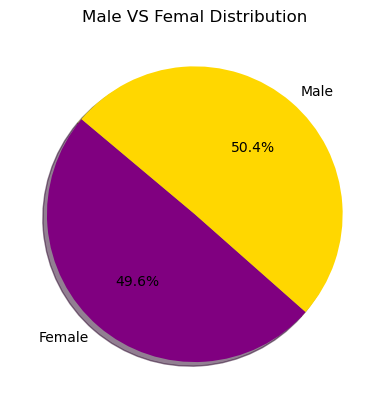

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

males = sex_df.loc["Male", "Total"]
females = sex_df.loc["Female", "Total"]

labels = sex_df.index
colors = ["purple", "gold"]
sizes = [females, males]
plt.pie(sizes, labels=labels, colors = colors,
        autopct="%1.1f%%" , shadow=True, startangle=140)
plt.title("Male VS Femal Distribution")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

copy_clean = pd.DataFrame.copy(clean_study_data)
final_four = copy_clean.set_index("Drug Regimen").loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].reset_index()

# Start by getting the last (greatest) timepoint for each mouse
final_four = final_four.groupby("Mouse ID")["Timepoint"].max()
final_four = pd. DataFrame(final_four).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(copy_clean, final_four, on = ["Timepoint", "Mouse ID"])
merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicance", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
lists = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = merged["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"The lower quartile of Tumor Volume (mm3) is{lowerq}.")
print(f"The upperquartiles of Tumor Volume (mm3) is{upperq}.")
print(f"The Interquartile range of Tumor Volume (mm3) is {IQR}.")

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in merged. iterrows():
        if row["Drug Regimen"] == treatment:
            lists.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(lists)

    # add subset


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound= upperq + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")


The lower quartile of Tumor Volume (mm3) is37.1877438025.
The upperquartiles of Tumor Volume (mm3) is59.930261755.
The Interquartile range of Tumor Volume (mm3) is 22.742517952499995.
Values below 3.0739668737500097 could be outliers
Values above 94.04403868374999 could be outliers


In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#plt.boxplot.frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"], labels = treatments, sym = ("b")
#plt.title("Variability of Top 4 Drug Regiments")

## Line and Scatter Plots

Text(0.5, 1.0, "Mouse s185's Capomulin Treatment Progression")

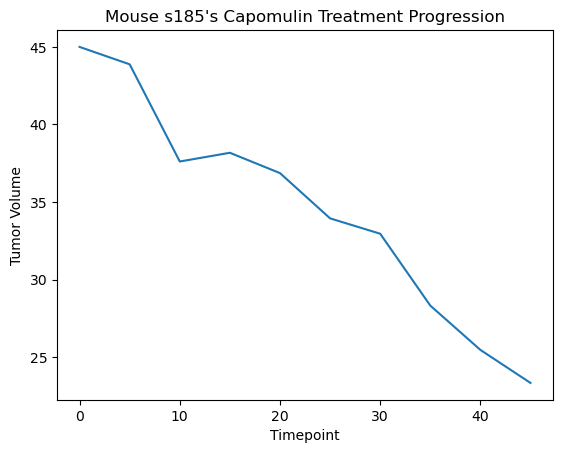

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
s185 = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"].loc[clean_study_data["Mouse ID"] == "s185"]

lx_axis = s185 ["Timepoint"].tolist()
ly_axis = s185 ["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185's Capomulin Treatment Progression")

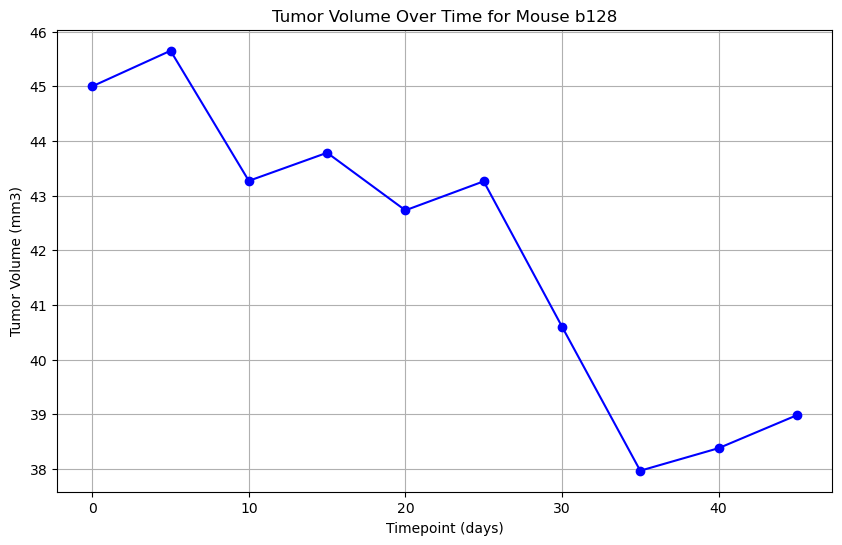

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_id=clean_study_data[clean_study_data['Drug Regimen']=='Capomulin']['Mouse ID'].iloc[0]
mouse_data=clean_study_data[clean_study_data['Mouse ID']==mouse_id]

plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'],'b-o')
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression


Correlation between mouse weight and tumor volume:0.8419


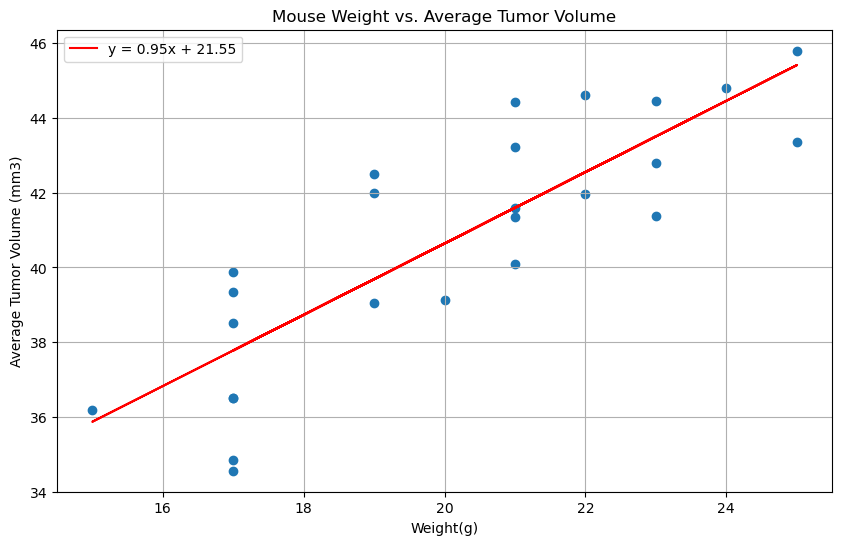

In [22]:
#scatter plot and linear regression 
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient and a linear regression model
correlation = stats.pearsonr(mouse_weights, average_tumor_volume)
print(f"\nCorrelation between mouse weight and tumor volume:{correlation[0]:.4f}")

#create scatter plot with regression line 
plt.figure(figsize=(10,6))
plt.scatter(mouse_weights, average_tumor_volume)

#calculate and plot regressioni line 
slope, intercept, r_value, p_value, Std_err = stats.linregress(mouse_weights, average_tumor_volume)
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()
